# *Task 3: Predicting Insurance Claim Amounts*

<p style='font-size:20px;'><i> The objective of this task is to estimate the medical insurance claim amount based on personal data. We will train Linear Regression model to predict charges.</i> </p>

## *Data Cleaning and Preprocessing*

In [23]:
# Import all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [24]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('insurance.csv')

In [25]:
# Display the first 5 rows of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
# Display number of rows and columns
df.shape

(1338, 7)

In [27]:
# Diplay consise overview of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [29]:
# Display overall statistics of the numerical features of the dataframe
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [30]:
# Check for any null values in the dataframe
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [31]:
# Check for duplicates in the dataframe
df.duplicated().sum()

1

In [32]:
# Remove the duplicates from the dataframe
df = df.drop_duplicates()

## *Feature Encoding*

In [33]:
# Create an instance of OneHotEncoder
ohe = OneHotEncoder(sparse_output=False,drop='first')
# Apply One Hot Encoding on the categorical features
df['sex'] = ohe.fit_transform(df[['sex']]).astype(int)
df['smoker'] = ohe.fit_transform(df[['smoker']]).astype(int)
df['region'] = ohe.fit_transform(df[['region']]).astype(int)

In [34]:
# Display the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## *Exploratory Data Analysis*

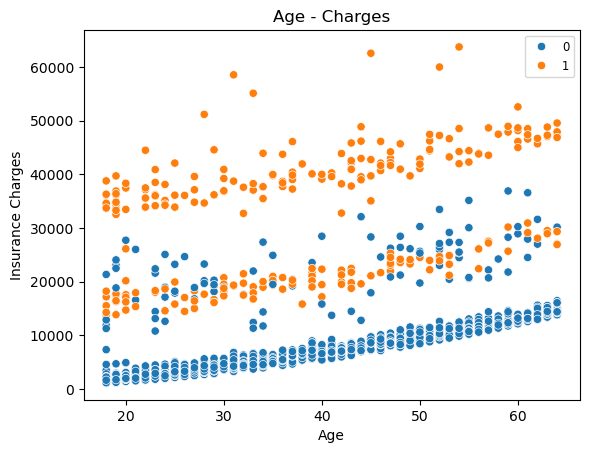

In [35]:
# Create a scatter plot of age versus insurance charges
sns.scatterplot(data= df ,x = "age", y = "charges", hue = "smoker")
plt.title("Age - Charges")
plt.xlabel("Age")
plt.ylabel("Insurance Charges")
plt.legend(bbox_to_anchor=(1, 1), ncol=1, fontsize = "small")
plt.show()

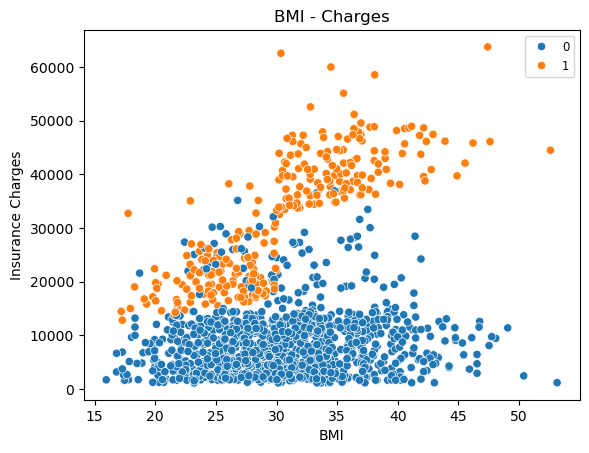

In [36]:
# Create a scatter plot of BMI against insurance charges
sns.scatterplot(data= df ,x = "bmi", y = "charges", hue = "smoker")
plt.title("BMI - Charges")
plt.xlabel("BMI")
plt.ylabel("Insurance Charges")
plt.legend(bbox_to_anchor=(1, 1), ncol=1, fontsize = "small")
plt.show()

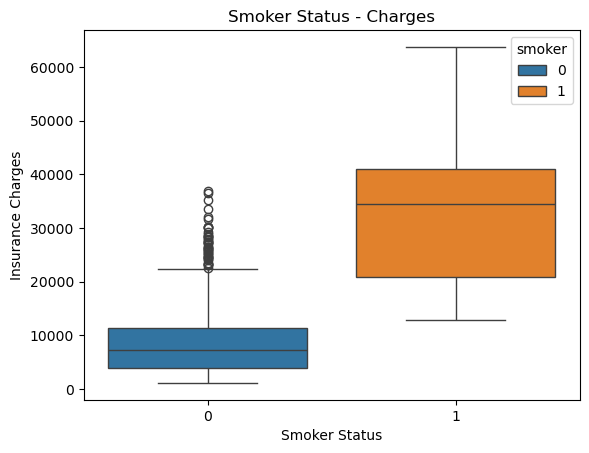

In [37]:
# Create a box plot of smoker status against insurance charges
sns.boxplot(data=df, x='smoker', y='charges', hue='smoker')
plt.title('Smoker Status - Charges')
plt.xlabel('Smoker Status')
plt.ylabel("Insurance Charges")
plt.show()

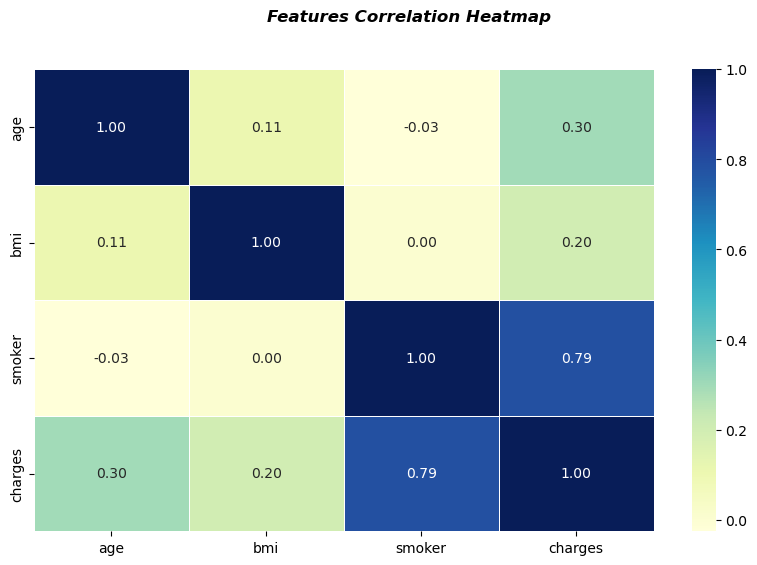

In [58]:
# Separate features
features = df[['age','bmi','smoker','charges']]
# Compute correlation matrix for the features
corr_matrix = features.corr()
# Plot the correlation matrix using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidth=0.5)
plt.suptitle('Features Correlation Heatmap', style='italic', weight='bold')
plt.show()

## *Building Classification Model*

In [59]:
# Separate features (x) and target variable (y)
x = df.drop(columns=['charges'])
y = df['charges']

In [61]:
# Split x and y into train and test data sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [64]:
# Display the features training set
x_train

,age,sex,bmi,children,smoker,region
1114,23,1,24.510,0,0,0
968,21,1,25.745,2,0,0
599,52,0,37.525,2,0,1
170,63,1,41.470,0,0,0
275,47,0,26.600,2,0,0
...,...,...,...,...,...,...
1096,51,0,34.960,2,1,0
1131,27,1,45.900,2,0,0
1295,20,1,22.000,1,0,0
861,38,0,28.000,3,0,0


In [65]:
# Display the corresponding target variable training set
y_train

1114     2396.09590
968      3279.86855
599     33471.97189
170     13405.39030
275      9715.84100
           ...     
1096    44641.19740
1131     3693.42800
1295     1964.78000
861      7151.09200
1127     5836.52040
Name: charges, Length: 1069, dtype: float64

## *Feature Scaling*

In [66]:
# Create an instance of StandardScaler
scaler = StandardScaler()
# Apply scaling to input data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## *Linear Regression Model Training*

In [69]:
# Create an instance of LinearRegression class
model = LinearRegression()
# Train the model 
model.fit(x_train_scaled,y_train)

LinearRegression()

In [70]:
# Make predictions on the trained model for the test set
y_pred = model.predict(x_test_scaled)

## *Model Evaluation*

In [71]:
# Evaluate model performance using MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 4196.014498581863


In [72]:
# Evaluate model performance using RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 5988.390508308377


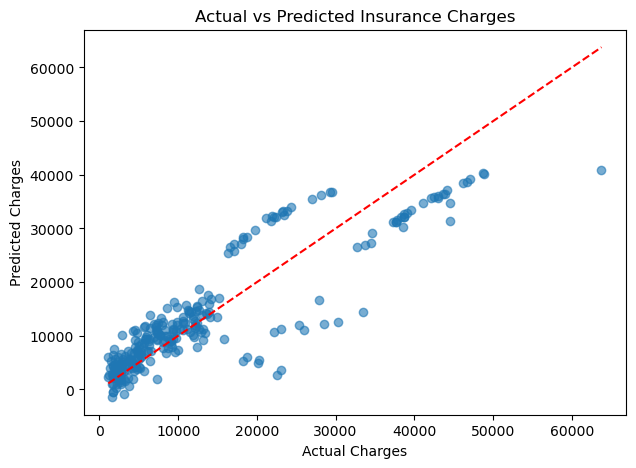

In [87]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


# *Conclusion*

<p style='font-size:20px;'><i> In this task, a Linear Regression model was trained to predict medical insurance claim amounts. Feature analysis and visualizations revealed that smoking, BMI and age are major factors influencing insurance costs. Smoking status has the strongest impact on insurance charges and BMI and age show a positive relationship with claim amounts. Model performance was evaluated using MAE and RMSE, provivding a quantitative measure of prediction accuracy.</i></p>